# Simulation von Übertragungsfunktion
https://docs.sympy.org/latest/modules/physics/control/control.html

## Übertragungsfunktionen

In [1]:
from sympy import *
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-od14nivy because the default path (/home/jupyter-jhub-admin/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
K=0.178
T=0.0265
G1= TransferFunction(K, 1+T*s, s)
display(G1)

TransferFunction(0.178, 0.0265*s + 1, s)

## Grafische Darstellung
### [Bodediagramm](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#bode-plot)

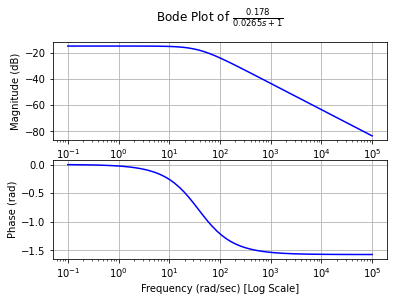

In [3]:
from sympy.physics.control.control_plots import bode_plot
bode_plot(G1, initial_exp=-1, final_exp=5)  

### Impulsantwortantwort
[Impuls response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#impulse-response-plot)  
Zeigt den Ausgang wenn am Eingang ein Dirac-Impuls angelegt wird. Vergleichbar mit dem Schlag des Klöppels auf die Glocke.

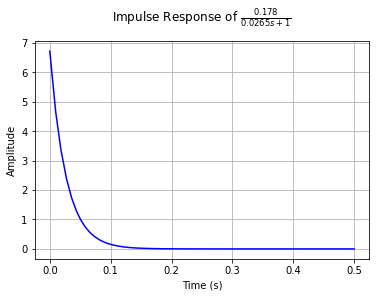

In [4]:
from sympy.physics.control.control_plots import impulse_response_plot
impulse_response_plot(G1,upper_limit=0.5)
    

### Sprungantwort
[Step response](https://docs.sympy.org/latest/modules/physics/control/control_plots.html#step-response-plot)

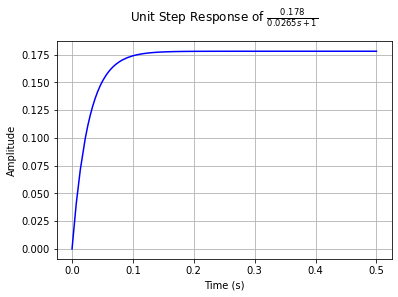

In [5]:
from sympy.physics.control.control_plots import step_response_plot, step_response_numerical_data
step_response_plot(G1,upper_limit=0.5)   

## Vergleich mit den Messdaten

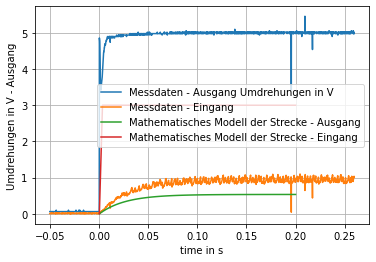

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Sprung_Endwert = 3 # Wie hoch ist der Sprung

# daten des mathematisches Modell plotten
dataSim = step_response_numerical_data(G1,upper_limit=0.2)


#Messdaten importieren
import pandas as pd
#Von Digilent
#df = pd.read_csv('3V.csv',header=10) # Hier müssen eventuell einstellungen gemacht werden um Messdaten aus unterscheidlichen Quellen korrekt zu lesen

#Von Tektronix
df = pd.read_csv('TEK00003.CSV',header=14)


df.columns = ['time', 'channel1', 'channel2'] # Spalten umbenennen für vereinfachte programmierung

#df.channel1 = df.channel1.rolling(window=100).mean() #Gleitender Mittelwert

# Daten plotten
plt.plot(df.time,df.channel1,label='Messdaten - Ausgang Umdrehungen in V')
plt.plot(df.time,df.channel2,label='Messdaten - Eingang')
plt.plot(dataSim[0],[item * Sprung_Endwert for item in dataSim[1]],label='Mathematisches Modell der Strecke - Ausgang')
plt.plot(dataSim[0],Sprung_Endwert*np.sign(dataSim[0]),label='Mathematisches Modell der Strecke - Eingang')
plt.legend()
plt.xlabel('time in s')
plt.ylabel('Umdrehungen in V - Ausgang')
plt.grid()
plt.show()


In [11]:
ls

3V.csv       LinearEquationsSolving.ipynb              TEK00003.CSV
Image1.jpeg  MessdatenVergleichStrecke.ipynb
LICENSE      SimulationStreckenverhaltenLaplace.ipynb


In [ ]:
df